### NumPy

In [1]:
import numpy as np

NumPy - это библиотека, написанная частично в С, а частично в питоне; ее основная задача - обеспечивать математические вычисления, в том числе работу с матрицами. Дело в том, что мы можем реализовать матрицы (и тензоры более высокой мерности) стандартными средствами питона, и мы это делали, но такие вещи все равно будут работать медленнее, чем библиотеки в С, просто потому, что так реализованы списки в питоне. Список в питоне может хранить в себе меняющееся число элементов, которые могут быть разного размера: на самом деле он реализован в С как сложная структура, (structure), если кому интересен исходный код в С:

(фигурными скобками обозначается тело определяемого объекта, тип которого - struct (структура). ob_item - это список адресов элементов списка, allocated - количество размещенных в памяти элементов).

    typedef struct {
        PyObject_VAR_HEAD
        PyObject **ob_item;
        Py_ssize_t allocated;
    } PyListObject;
    
То есть, список питона - это связная структура, элементы которой могут валяться в памяти где угодно, а питон их отыскивает с помощью указателей (указатель в С - это переменная, которая содержит адрес объекта, такая переменная записывается со звездочкой: \*var, а массив в С определяется его стартовой позицией в памяти, потому что все элементы должны лежать рядышком и быть одинакового размера, поэтому массив записывается с двумя звездочками). В компьютерном мире так устроено, что, грубо говоря, пока там питон отыщет все элементы списка в разных уголках памяти, это займет время - а вот когда все элементы лежат рядышком, то времени уходит куда меньше. Матрицы (списки) в numpy реализованы таким образом, что все их элементы одинакового размера и хранятся в памяти вместе, поэтому они и работают гораздо быстрее. 

В связи с реализацией в С у Numpy есть и такая особенность, как немножко свои типы данных (они больше похожи на типы в С). Такие типы есть:

    i - integer
    b - boolean
    u - unsigned integer
    f - float
    c - complex float
    m - timedelta
    M - datetime
    O - object
    S - string
    U - unicode string
    V - fixed chunk of memory for other type (void)
    
(void в С ~ NoneType в питоне, а типы чисел более дробные: есть беззнаковые инты - у которых не хранится знак - есть инт и флоат разных размеров, 32 бита или 64: чем больше битов, тем больше чиселок может храниться в переменной такого типа). 

Эти буковки могут использоваться для задания типа данных в основном объекте NumPy - ndarray (n-dimensional array).

Здесь немного сложного: 

Центральное понятие для NumPy (а также для PyTorch, например, и вообще для МО и НС) - это тензор. Это понятие из математики, и тензор на самом деле != матрица, даже многомерная матрица. Тензор - это такой математический объект, который не изменяется при смене системы координат и представлен набором своих компонент и правилом преобразования компонент при смене базиса. Сложно? Если пытаться совсем упростить, то тензор - это всего лишь хранилище данных. Попытаться это понять можно [здесь](https://habr.com/ru/post/261563/). То есть, в тензорах мы храним что? числа, векторы, матрицы. У тензора есть ранг (rank) или измерение: это ровно то, о чем идет речь в NumPy, когда мы указываем измерение ndarray. Внутри тензора могут содержаться, например, n-мерные векторы. 

In [2]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

In [3]:
arr.ndim

2

Вот, например, перед нами массив NumPy ранга 2, но при этом векторы, которые в нем содержатся, трехмерные. 

Тензор еще считается обобщенной матрицей: матрица - это же табличка чисел $n \cdot m$, а тензор бывает разных рангов. Для маленьких рангов есть отдельные термины:

- 0D - скаляр (число)
- 1D - вектор
- 2D - матрица
- 3D и выше - тензор 

В геометрии есть похожее соотношение: квадрат - куб - симплекс (любая фигура со сторонами одинаковой длины - 1 - в n-мерном пространстве называется n-мерный симплекс)

Итак, как задать массив в NumPy и проверить его мерность, можно понять из кода выше. Можно мерность задать при создании массива, при этом передавать ему список списков списков необязательно:

In [4]:
arr = np.array([1, 2, 3, 4, 5], ndmin=5)

In [5]:
arr

array([[[[[1, 2, 3, 4, 5]]]]])

В таком случае нумпай начнет вкладывать наши списки списков начиная с самого внутреннего измерения. 

In [6]:
arr = np.array([1, 2, 3], ndmin=2)

In [7]:
arr

array([[1, 2, 3]])

C рангом 2 должно быть интуитивно понятнее: я всего лишь сделала матрицу из одной строчки. Для чего это может быть нужно? Для broadcasting - когда нам нужно произвести какие-то вычисления с тензорами разных рангов, если один из тензоров превращается в тензор более высокого ранга, происходит он самый, broadcasting. Еще попозже это рассмотрим. 

В NumPy (как потом увидим, и в Pandas) измерения массива еще называются оси (axes). 

#### Тип данных

Возвращаясь к типу данных, можно его проверить следующим образом:

In [8]:
arr.dtype

dtype('int64')

А можно и явным образом указать с помощью буковки из списка выше:

In [9]:
arr = np.array([1, 2, 3, 4, 5], dtype='S')

In [10]:
arr

array([b'1', b'2', b'3', b'4', b'5'], dtype='|S1')

Строки в NumPy тоже немножечко особенные, поэтому не удивляйтесь буковке b - она означает "байтовая строка". 

Поменять тип данных в массиве можно так:

In [11]:
newarr = arr.astype('i')

In [12]:
newarr

array([1, 2, 3, 4, 5], dtype=int32)

#### Индексирование

Как можно обращаться к элементам массива? По индексам. Только они устроены немножко похитрее, чем стандартные питоньи (где нам пришлось  бы писать [0][0][0] для первого элемента первой строки первого... эээ, даже не знаю. Ранга. :)

In [13]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [14]:
arr

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

Вот у нас трехмерный массив. Допустим, мы хотим обратиться к четверке. Четверка находится в первой из двух матриц, во второй строке первой матрицы, на второй позиции этой строки. 

In [15]:
arr[0, 1, 1]

4

Супер. Также можно использовать срезы: например, можно получить всю вторую строку первой матрицы. 

In [16]:
arr[0, 1, :]

array([3, 4])

И даже весь второй столбец. 

In [17]:
arr[0, :, 1]

array([2, 4])

Можно, конечно, и только часть столбца взять, просто у меня супер-короткие столбцы. 

#### Форма

Форму матрицы можно изменять с помощью метода reshape. 

In [18]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
arr.reshape(3, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

То есть, что передается в reshape? Столько цифр, сколько хотим измерений (я передала 2 - значит, я хочу матрицу), каждая цифра говорит о том, сколько я хочу элементов в каждом из этих измерений (три строки, три столбца). Tricky part здесь в том, что общее число элементов должно делиться на эти числа: то есть, все переданные числа, перемноженные друг на друга, должны давать число всех элементов ($ 3 \cdot 3 = 9$).

Если мы не можем так с ходу вычислить, сколько нам нужно элементов, можно попробовать один из них передать как минус единицу, тогда питон попробует вычислить его сам:

In [20]:
arr = np.array(range(1, 13))

In [21]:
arr.reshape(3, 2, -1)

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

-1 могло бы стоять вместо любой из цифр. Увы, если у вас не хватает элементов в массиве, чтобы разложить его на нужное количество, остается только добавлять эти элементы до того, как вы будете решейпить:

In [22]:
arr = np.array(range(1, 12))
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [23]:
arr = np.append(arr, 0)  # можно было бы и None добавить, но лучше уж 0, чтобы numpy не пришлось менять тип данных на object

In [24]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0])

Превратить любой массив в одномерный можно разными способами (ravel, flatten...), но в частности, можно просто отрешейпить в -1:

In [25]:
curled = np.array([[1, 2, 3], [4, 5, 6]])
curled

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
flat = curled.reshape(-1)
flat

array([1, 2, 3, 4, 5, 6])

#### view vs base

Также еще одна важная особенность массивов NumPy, о которой следует знать - это различие между base и view object. Для чего эта сложность? Это мы с вами на учебных занятиях возимся с массивчиками, в которых по три с половиной элемента, а в реальных программах массивы могут содержать миллиарды чисел. Случайно копировать такой массив, конечно, не улыбается, поэтому все библиотеки типа NumPy стараются избегать копирования, как только могут (ванильный питон тоже это делает - вспомните особенности копирования списков и других изменяемых объектов). 

view-массив - это такой массив, который собственных данных не содержит, а просто берет их из какого-то base-массива, но отображает по-своему. reshape как раз всегда возвращает такие вот "виды". Чтобы проверить, вид перед вами или база, можно обратиться к атрибуту:

In [27]:
arr.base

In [28]:
arr_view = arr.reshape(3, 4)

In [29]:
arr_view.base

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0])

Если массив оригинальный и владеет своими данными, то base вернет пустоту, в ином случае - хозяина данных. То есть, как легко догадаться, если мы будем изменять данные в массиве arr, данные в массиве arr_view тоже изменятся:

In [30]:
arr[2] = 123

In [31]:
arr_view

array([[  1,   2, 123,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,   0]])

Явным образом создать копию можно с помощью метода copy(). 

#### Итерирование

Как итерироваться по массивам? Можно тупо по индексам с помощью for, но для многомерных массивов это может быть сложновато, поэтому есть специальная функция:

In [32]:
for elem in np.nditer(arr):
    print(elem, end='\t')

1	2	123	4	5	6	7	8	9	10	11	0	

Есть и альтернатива enumerate для массивов:

In [33]:
for i, elem in np.ndenumerate(arr):
    print(i, elem, end='\t')

(0,) 1	(1,) 2	(2,) 123	(3,) 4	(4,) 5	(5,) 6	(6,) 7	(7,) 8	(8,) 9	(9,) 10	(10,) 11	(11,) 0	

#### Операции с массивами

Какие действия вообще возможно выполнять с массивами?

In [34]:
arr = np.array([1, 2, 3, 4, 5])

Все стандартные операции с числами будут произведены поэлементно:

In [35]:
arr + 1

array([2, 3, 4, 5, 6])

In [36]:
arr * 5

array([ 5, 10, 15, 20, 25])

In [37]:
arr - 4

array([-3, -2, -1,  0,  1])

In [38]:
arr ** 2

array([ 1,  4,  9, 16, 25])

In [39]:
arr / 5

array([0.2, 0.4, 0.6, 0.8, 1. ])

Логические операции между двумя массивами будут давать массив из булей:

In [40]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

А если у нас два массива, и мы хотим их сложить?

In [41]:
a + b

array([5, 4, 5, 8])

Тут, правда, может возникнуть незадача...

In [42]:
a + arr

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Это и есть тот самый broadcasting: чтобы произвести операции между неравными по размеру массивами, NumPy пытается превратить их в равные, но иногда у него не получается. В манах по NumPy можно найти картинку, наглядно объясняющую broadcasting: 

<img src=numpy_broadcasting.png>

#### Конкатенация и разделение

Окей, а если мы хотим объединить два массива, при этом не складывая их? Тут есть несколько вариантов:

In [43]:
arr1 = np.array([[1, 2, 3]])
arr2 = np.array([[4, 5, 6]])

In [44]:
arr = np.concatenate((arr1, arr2))
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
arrv = np.concatenate((arr1, arr2), axis=1)
arrv

array([[1, 2, 3, 4, 5, 6]])

In [46]:
np.stack((arr1, arr2))

array([[[1, 2, 3]],

       [[4, 5, 6]]])

Тут немного неочевидно - но stack возвращает массив большей мерности, когда склеивает, а concatenate - нет. 

Посплитить тоже можно:

In [47]:
np.array_split(arr, 2)

[array([[1, 2, 3]]), array([[4, 5, 6]])]

#### Поиск, сортировка, фильтрация

Можно искать по массиву элемент, который чему-нибудь равен:

In [48]:
arr = np.array([[1, 2, 3], [2, 3, 1]])
np.where(arr==3)

(array([0, 1]), array([2, 1]))

В этом случае вернутся индексы найденных элементов.

where умеет еще и заменять найденное:

In [49]:
np.where(arr == 3, 333, arr)

array([[  1,   2, 333],
       [  2, 333,   1]])

Сортировать массивы можно с помощью np.sort(), которая возвращает копию массива, а оригинальный массив оставляет нетронутым. 

Фильтрация массива - очень мощная и крутая штуковина. Например, мы можем наложить своего рода маску на массив:

In [50]:
arr = np.array([1, 2, 3, 4])
filt = [False, True, False, True]
arr[filt]

array([2, 4])

Подобная маска нам, конечно, вряд ли пригодится в реальной жизни, но можно задавать ее с помощью условия:

In [51]:
filt = arr % 2 == 1
arr[filt]

array([1, 3])

То есть, условие поэлементно применяется к массиву, и возвращаются только те элементы, которые прошли испытание. 

Можно и напрямую:

In [52]:
arr[arr % 2 == 1]

array([1, 3])

#### Рандомизация

В NumPy есть свой подмодуль random, у которого есть следующие вещи:.

In [53]:
np.random.randint(100, size=(3, 5))

array([[13, 79, 77, 45, 65],
       [79, 77, 69, 16, 49],
       [21, 15, 71, 13, 36]])

In [54]:
np.random.rand(5)

array([0.71523449, 0.2280614 , 0.602283  , 0.59748733, 0.8102286 ])

In [55]:
np.random.randn(3,2)

array([[ 1.13376665, -1.21084091],
       [ 0.65017331, -1.03202383],
       [ 0.03266352,  2.59801228]])

Первая функция генерирует массив заданного размера в диапазоне от 0 до 100, вторая - массив заданного размера, состоящий из рандомных чисел от 0 до 1, а третья - то же, что вторая, но числа могут быть отрицательными и не обязательно от 0 до 1. 

#### Диапазон

Можно генерировать массивы, состоящие из числовых диапазонов, как я это делала выше, но обычно используется своя функция NumPy:

In [56]:
np.arange(1, 13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Для более упорядоченной генерации чисел есть также такая функция:

In [57]:
np.linspace(1, 12, 15)

array([ 1.        ,  1.78571429,  2.57142857,  3.35714286,  4.14285714,
        4.92857143,  5.71428571,  6.5       ,  7.28571429,  8.07142857,
        8.85714286,  9.64285714, 10.42857143, 11.21428571, 12.        ])

В чем ее прикол? А она генерирует только такие точки, которые укладываются на прямую между точкой начала и конца (аргументы функции - старт, стоп, количество чисел). Если построить график, можно получить прямую:

In [58]:
import matplotlib.pyplot as plt

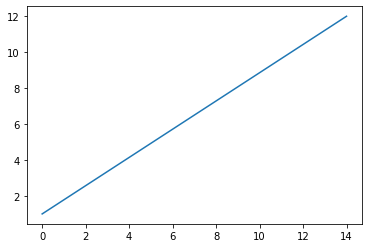

In [59]:
plt.plot(np.linspace(1, 12, 15))
plt.show()

### PANDAS

Pandas - сокращение от panel data (табличные данные). Это библиотека, которая используется в основном для анализа данных и машинного обучения, но в ней также удобно, например, обрабатывать выдачу из корпуса типа ГИКРЯ и любые другие текстовые данные, которые содержатся в табличках. 

Pandas - очень быстрая библиотека, потому что основывается на библиотеке numpy, а та, как мы помним, написана внутри себя на языке С. С этим фактом связаны и типы данных pandas - они во многом дублируют типы numpy, пришедшие из С. 

Pandas **гораздо** быстрее обрабатывает данные, чем стандартные методы питона, в частности циклы. Если вы пишете код, в котором используете циклы в pandas, очень возможно, что это плохой код. 

Еще pandas заточен под использование в тетрадках .ipynb и умеет красиво отображать данные. 

Мы с вами посмотрели, естественно, только самые базовые и постоянно требующиеся вещи; библиотека pandas, как и numpy (и любая другая старая, большая и полезная библиотека питона), на самом деле огромная, все ее содержимое выучить невозможно, и я всячески призываю обращаться к документации и стэковерфлоу. Если вам нужно что-то этакое сделать, сперва погуглите, не сделал ли это кто-то уже до вас (золотое правило любого разраба). 

Библиотеку необходимо сперва установить:

    pip install pandas

In [1]:
import pandas as pd  
# это настолько устоявшееся сокращение, что все так делают

Два основных класса, которые есть в модуле - это класс DataFrame (собственно таблица) и класс Series (колонка или строка в таблице). 

Создать DataFrame можно из списка списков, списка словарей, словаря списков или словаря словарей. 

In [3]:
df1 = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
df1

,0,1,2
0,1,2,3
1,4,5,6


In [4]:
df2 = pd.DataFrame([{'col1': 1, 'col2': 2}, {'col1': 3, 'col2': 4}])
df2

,col1,col2
0,1,2
1,3,4


In [5]:
df3 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
df3

,col1,col2
0,1,4
1,2,5
2,3,6


In [8]:
df4 = pd.DataFrame({'col1': {'l1': 1, 'l2': 2}, 'col2': {'l1': 3, 'l2': 4}})
df4

,col1,col2
l1,1,3
l2,2,4


Также pandas отлично работает с csv, json, excel-файлами. Для excel, правда, нужно дополнительно установить openpyxl. Интерфейс очень простой: достаточно написать функцию для чтения этого формата и передать только путь к файлу. 

In [ ]:
data = pd.read_json(path)
data = pd.read_csv(path)
data = pd.read_excel(path)

Внутри себя табличка pandas устроена очень похоже именно на помесь словаря и списка, поэтому можно обращаться к ее частям, как к ключам в словаре или индексам в списке:

In [9]:
df3['col1']

0    1
1    2
2    3
Name: col1, dtype: int64

Когда мы так делаем, нам показывается формат Series - та самая колонка (или строчка) таблицы. Помимо имени колонки (или индекса строки), pandas еще указывает тип данных, которые содержатся в ячейках. Поскольку внутри себя pandas работает в С, а у С другие типы данных (там различаются int и float по размерам), pandas тоже указывает немного непривычные int64, float32 и подобное. 

К колонке таблицы, если в ее имени нет каких-нибудь пробелов и нестандартных символов, можно обращаться через точку от имени таблицы:

In [10]:
df3.col1

0    1
1    2
2    3
Name: col1, dtype: int64

Строки мы смотрим с помощью loc:

In [11]:
df4.loc['l2']

col1    2
col2    4
Name: l2, dtype: int64

Если у нас вместо индексов у строчек названия, то пишем прямо названия, как в ячейке выше. Если индексы - числа, то можно писать числа. Можно вообще всегда писать числа, если использовать iloc:

In [12]:
df4.iloc[1]

col1    2
col2    4
Name: l2, dtype: int64

К отдельной ячейке можно обратиться, если сперва указать ее колонку, а потом строку:

In [13]:
df4['col2']['l1']

3

Также можно воспользоваться iloc:

In [16]:
df4.iloc[0, 1]  # 0 - номер колонки, 1 - номер строки

3

Наконец, pandas умеет показывать отдельно начало, отдельно конец таблицы и выбирать случайные строки для показа. 

In [17]:
titanic = pd.read_csv('titanic.csv')
titanic.head() # по умолчанию показывает первые 5 строк; можно в скобочках указать другое число

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
titanic.sample(3)  # по умолчанию показывает одну случайную строку

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.000,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.925,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.050,NaN,S


Также можно посмотреть отдельно индексы и отдельно список имен колонок для таблицы:

In [20]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [21]:
df4.index

Index(['l1', 'l2'], dtype='object')

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Можно сразу попросить pandas описать загруженную табличку, а то еще и немного проанализировать ее за нас:

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Метод info() выведет список всех колонок, посчитает, сколько в них непустых значений, и укажет, какого типа данные в них лежат. object - это обычно строка. 

In [24]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Метод describe() выведет для каждой из цифровых колонок таблички число непустых значений, их среднее арифметическое, [стандартное отклонение](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5), самое маленькое значение, [квантили](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C#%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_%D0%B8_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D0%B8) и максимальное значение. 

(Все эти термины статистики с Лагутиным будете разбирать в след. семестре). 

Таблички в pandas особенно хороши тем, что можно брать только какие-то их части, как в excel с фильтром, при этом сама библиотека очень экономит оперативную память; можно с помощью условий заставить pandas показать только те строчки, значения в которых удовлетворяют нашему условию. Например, хотим получить только тех пассажиров, которые выжили (Survived = 1) и при этом плыли третьим классом (Pclass):

In [25]:
titanic[(titanic.Survived == 1) & (titanic.Pclass == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


Получим в результате такую же табличку, которую можно будет сохранить в отдельную переменную при желании и работать с ней как хотим. Кстати, у любой таблички pandas можно посмотреть количество ее строк с помощью самой обычной функции len(). 

В табличках могут быть пропущенные значения ячеек: когда в ячейке ничего не заполнено. Можно проверить, есть ли в нашей таблице такие значения, если использовать следующую комбинацию:

In [26]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Метод isna() возвращает True, если есть пропуск, а any() возвращает True, если хотя бы одна ячейка при проверке isna() дала True. Видим, что не у всех указаны возраст, кабина и какое-то значение посадки. 

Можно также посмотреть уникальные значения для любого столбца таблицы, двумя способами:

In [27]:
print(set(titanic.Sex))
print(titanic['Sex'].unique())

{'male', 'female'}
['male' 'female']


Также можно отдельно посчитать среднее арифметическое и сумму:

In [29]:
titanic.Age.mean()

29.69911764705882

In [30]:
titanic.Survived.sum()

342

Эти методы можно применять ко всей таблице, но если в ней есть не только числовые данные, лучше не надо, используйте тогда describe().

Как можно изменять таблички?

Во-первых, можно чистить табличку от пропусков:

In [31]:
titanic.dropna() # такая чистка вернет новую таблицу, а старая останется неизменной

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [32]:
titanic.dropna(inplace=True)  # многие методы pandas имеют такой параметр: это заставит pandas вносить изменения прямо в текущую табличку

Можно удалить и вообще любую произвольную строчку:

In [33]:
titanic.drop(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


С методом drop() то же самое: можно сохранять изменения в текущей табличке, а можно создавать новую. 

Если хотим удалить целый столбец, нужно указать ось (строчки у нас - это как бы х на графике, а столбцы = это y)

In [35]:
titanic.drop('SibSp', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S


Если хотим удалить из таблички повторяющиеся строки, можно использовать:

In [ ]:
titanic.drop_duplicates(keep='first', inplace=True)  # я запускать не стала, потому что в Титанике нет повторяющихся строк. 

Если хотим что-то добавить в табличку, для строк можно воспользоваться loc:

In [36]:
df3

,col1,col2
0,1,4
1,2,5
2,3,6


In [38]:
df3.loc[3] = [7, 8]

In [39]:
df3

,col1,col2
0,1,4
1,2,5
2,3,6
3,7,8


Обратите внимание, iloc здесь пользоваться нельзя - он умеет только перезаписывать уже существующие строки. 

Можно добавить и столбец:

In [40]:
df3['col3'] = pd.Series(['x', 'y', 'z', 'w'])

In [41]:
df3

,col1,col2,col3
0,1,4,x
1,2,5,y
2,3,6,z
3,7,8,w


Можно добавлять столбцы на основе уже существующих, а также изменять существующие с помощью какой-то функции, которая будет применяться к каждой ячейке столбца. 

In [42]:
df3['col1'].apply(lambda x: x + 1)  # увеличим все числа в столбце 1 на 1

0    2
1    3
2    4
3    8
Name: col1, dtype: int64

In [43]:
df3.apply(lambda x: x * 2)

,col1,col2,col3
0,2,8,xx
1,4,10,yy
2,6,12,zz
3,14,16,ww


In [44]:
df3['col4'] = df3.col3.apply(len)

In [45]:
df3

,col1,col2,col3,col4
0,1,4,x,1
1,2,5,y,1
2,3,6,z,1
3,7,8,w,1


Как видим, метод apply() может применяться как ко всей таблице, так и к отдельным колонкам. Чаще применяется к колонкам, потому что в таблице не всегда бывают колонки, которые содержат один тип данных. Необязательно писать и лямбда-функцию: главное понимать, что эта функция должна принимать и возвращать (здесь все точно так же, как с параметром key в сортировках). 

Также в pandas есть готовый метод OHE (One Hot Encoding), про который, если вы забыли, можно освежить знания на [вики](https://en.wikipedia.org/wiki/One-hot). Если у нас есть колонка с категориальным признаком (что такое категориальный признак? Даже если он из чисел, в отличие от цифрового, эти числа между собой арифметически не соотносятся. Чаще, впрочем, категориальный признак - это что-то вроде "из какого города": у нас есть n городов, и мы не можем их просто пронумеровать, потому что если мы укажем, что Москва у нас - 1, а Петербург - 2, то разве Петербург больше Москвы? Что это будет значить?), то можно применить OHE в pandas к ней и получить дополнительные колонки:

In [ ]:
new_cols = pd.get_dummies(df.column_name, prefix='prefix', drop_first=True)

В Титанике нет удобных столбцов с признаками, которые хотелось бы заменить, поэтому код абстрактный. То есть, в строке выше мы создаем дополнительную табличку из n - 1 колонок для n вариантов значений колонки column_name с префиксом (названия колонок будут prefix_1, prefix_2...), и удаляем сразу первый столбец, потому что он избыточный для OHE. 

Дальше можно смержить получившееся:

In [ ]:
df.drop('column_name', inplace=True) # исходный столбец больше не нужен
df = df.join(new_cols)

#### Агрегация

Агрегация - это важный способ получать новые данные при анализе. Когда мы говорим, что агрегируем данные, это означает, что мы их по сути группируем. В pandas есть разные способы группировки данных. Самый простой - это использовать groupby: 

In [46]:
titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,461.818182,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900
male,449.389474,0.431579,1.168421,38.451789,0.400000,0.410526,69.124343


Но groupby позволяет сгруппировать данные только по какому-то одному столбцу (признаку). Обычно к результату метода применяется mean() или sum(). 

Более хитрый способ группировки - использовать pivot_table(). Почитать о нем, во-первых, можно [здесь](https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas), а во-вторых, я нашла отличную [тетрадку](https://colab.research.google.com/drive/1S1kGoGEC39zi48jWbKeBae7nd1HQQZMR?usp=sharing), которая позволит досконально разобраться. Собственно говоря, пример на занятии был взят оттуда. 

То есть, pivot_table позволяет группировать данные по нескольким признакам сразу, а еще отдельно считать несколько разных функций на сгруппированных значениях (можно одновременно узнать и среднее арифметическое, и сумму, и что захотите, в принципе). 

In [60]:
pd.pivot_table(df, index=['Manager', 'Rep'], values=['Price'], columns=['Product'], aggfunc=[np.sum, np.mean])

sum                                  mean  \
                                Price                                 Price   
Product                           CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                             
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0  32500.0   
              Daniel Hilton  105000.0         NaN     NaN  10000.0  52500.0   
              John Smith      35000.0      5000.0     NaN      NaN  35000.0   
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0  47500.0   
              Wendy Yule     165000.0      7000.0  5000.0      NaN  82500.0   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker       5000.0     NaN  10000.0  
              Daniel Hilton         NaN     NaN  10000.0  
              John Smith         5000.0     NaN      NaN  
Fred Anderson Cedric Moss        5000.0     NaN  10000.0  
              Wendy Yule         7000.0  5000.0      NaN